In [1]:
!pwd

/Users/user/Documents/MLProjects/project6/ShopTalk/research


In [3]:
cd '../artifacts/data_ingestion/'


/Users/user/Documents/MLProjects/project6/ShopTalk/artifacts/data_ingestion


/Users/user/Documents/MLProjects/project6/ShopTalk/env/lib/python3.10/site-packages/IPython/core/magics/osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


The below path shows there is input file abo-listing.tar already exists inside data ingestion

In [6]:
!pwd
!ls

/Users/user/Documents/MLProjects/project6/ShopTalk/artifacts/data_ingestion
abo-images-small
abo-listings.tar
data.tar
data_tar_extracted
listings
processed_dataset_target_data_with_captions_only.csv


In [2]:
import tarfile
import json
import os
import pandas as pd
import gzip


In [7]:
pwd

'/Users/user/Documents/MLProjects/project6/ShopTalk/artifacts/data_ingestion'

Extracting datat from abo-listing.tar file - the data is in format of json. Combines the data from all listings json for selected columns and create csv file.


In [19]:
import os
import tarfile
import pandas as pd

def extract_value(x, key='value', tag=None, tag_key='language_tag'):
    if x is None or not isinstance(x, list):
        return None
    if tag:
        values = [item[key] for item in x if isinstance(item, dict) and item.get(tag_key, '').startswith(tag)]
    else:
        values = [item[key] for item in x if isinstance(item, dict) and key in item]
    return values[0] if values else None

def concatenate_values(x):
    if x is None or not isinstance(x, list):
        return None
    return ', '.join([item['value'] for item in x if isinstance(item, dict) and item.get('language_tag', '').startswith('en')])

def extract_and_filter_json_gz(tar_path):
    extraction_path = 'data_extracted/'
    filtered_data = []
    if not os.path.exists(extraction_path):
        os.makedirs(extraction_path)

    with tarfile.open(tar_path, 'r:*') as tar:
        tar.extractall(path=extraction_path)
        for root, dirs, files in os.walk(extraction_path):
            for file in files:
                if file.endswith('.json.gz'):
                    file_path = os.path.join(root, file)
                    print(f"Processing file: {file_path}")
                    meta = pd.read_json(file_path, lines=True, compression='gzip')
                    meta['item_name_in_en'] = meta['item_name'].apply(lambda x: extract_value(x, tag='en'))
                    meta['model_name'] = meta['model_name'].apply(lambda x: extract_value(x, tag='en'))
                    meta['product_type'] = meta['product_type'].apply(extract_value)
                    meta['bullet_point'] = meta['bullet_point'].apply(lambda x: concatenate_values(x) if isinstance(x, list) else None)
                    meta['color'] = meta['color'].apply(lambda x: concatenate_values(x) if isinstance(x, list) else None)
                    meta['style'] = meta['style'].apply(lambda x: extract_value(x, tag='en') if isinstance(x, list) else None)
                    meta['brand'] = meta['brand'].apply(lambda x: extract_value(x, tag='en') if isinstance(x, list) else None)
                    meta['item_keywords'] = meta['item_keywords'].apply(lambda x: concatenate_values(x) if isinstance(x, list) else None)
                    meta = meta[~meta['item_name_in_en'].isna()][["item_id", "product_type", "brand", "model_name", "item_name_in_en", "bullet_point", "color", "style", "main_image_id", "item_keywords"]]
                    print(f"#products with English title: {len(meta)}")
                    print(meta.head())
                    filtered_data.append(meta)
                    os.remove(file_path)

    final_data = pd.concat(filtered_data, ignore_index=True)
    return final_data

first_df = extract_and_filter_json_gz('abo-listings.tar')
print(first_df)


Processing file: data_extracted/listings/metadata/listings_b.json.gz
#products with English title: 7701
      item_id         product_type                  brand  \
0  B08DV9LXW3            ACCESSORY                   CGTL   
1  B073ZTQ44Y              GROCERY         Wickedly Prime   
2  B0853WWJFY  CELLULAR_PHONE_CASE  Amazon Brand - Solimo   
3  B07TG2XBHV  CELLULAR_PHONE_CASE  Amazon Brand - Solimo   
4  B07TH32WC3  CELLULAR_PHONE_CASE  Amazon Brand - Solimo   

                     model_name  \
0                          None   
1                          None   
2                      Itel A25   
3  Asus Zenfone 3 Laser ZC551KL   
4                      Vivo Y69   

                                     item_name_in_en  \
0  CGTL Ear Loops Face Bandana Neck Gaiter Stylis...   
1  Wickedly Prime Mustard, White Wine Jalapeno, 1...   
2  Amazon Brand - Solimo Designer Sperking Stars ...   
3  Amazon Brand - Solimo Designer White Peacock R...   
4  Amazon Brand - Solimo Designer Vall

Chekcing the shape of data

In [20]:
first_df.shape

(122734, 10)

In [ ]:
# Ckecking if content of bullets is coming fully or truncated
first_df['bullet_point'][5]

'3D Printed Hard Back Case Mobile Cover for Gionee S6s, Easy to put & take off with perfect cutouts for volume buttons, audio & charging ports., Stylish design and appearance, express your unique personality., Extreme precision design allows easy access to all buttons and ports while featuring raised bezel to life screen and camera off flat surface., Slim Hard Back Cover, No Warranty'

In [21]:
first_df

,item_id,product_type,brand,model_name,item_name_in_en,bullet_point,color,style,main_image_id,item_keywords
0,B08DV9LXW3,ACCESSORY,CGTL,None,CGTL Ear Loops Face Bandana Neck Gaiter Stylis...,None,Multicolor11,None,51GM3Rpdm8L,None
1,B073ZTQ44Y,GROCERY,Wickedly Prime,None,"Wickedly Prime Mustard, White Wine Jalapeno, 1...","One 11.75-ounce pastic squeeze bottle, Spice L...",None,None,71laOiTgJEL,"mustard, jalapeno, spicy mustard, pickled jala..."
2,B0853WWJFY,CELLULAR_PHONE_CASE,Amazon Brand - Solimo,Itel A25,Amazon Brand - Solimo Designer Sperking Stars ...,"Snug fit for Itel A25, with perfect cut-outs f...",Multicolor,pattern,61PjvipfNfL,"Back Cover, Designer Case, Designer Sperking S..."
3,B07TG2XBHV,CELLULAR_PHONE_CASE,Amazon Brand - Solimo,Asus Zenfone 3 Laser ZC551KL,Amazon Brand - Solimo Designer White Peacock R...,3D Printed Hard Back Case Mobile Cover for Asu...,Others,None,81zNMSIDRRL,"mobile cover, back cover, mobile case, phone c..."
4,B07TH32WC3,CELLULAR_PHONE_CASE,Amazon Brand - Solimo,Vivo Y69,Amazon Brand - Solimo Designer Valley View 3D ...,3D Printed Hard Back Case Mobile Cover for Viv...,Others,None,710EXpQig4L,"mobile cover, back cover, mobile case, phone c..."
...,...,...,...,...,...,...,...,...,...,...
122729,B07W6RQPRN,BEAUTY,365 Everyday Value,None,"365 EVERYDAY VALUE Aloe Vera After Sun Spray, ...",Brought to you by Whole Foods Market. The pac...,None,None,61m+5dRPhxL,None
122730,B07TBV47MD,CELLULAR_PHONE_CASE,Amazon Brand - Solimo,Samsung Galaxy A6,Amazon Brand - Solimo Designer Grayish Marble ...,3D Printed Hard Back Case Mobile Cover for Sam...,Others,None,81Kyg8cr4DL,"mobile cover, back cover, mobile case, phone c..."
122731,B07YNJY17M,GROCERY,365 by Whole Foods Market,None,"365 by Whole Foods Market, Organic Refrigerate...",Brought to you by Whole Foods Market. The pac...,None,None,71nEbNy9fsL,None
122732,B07TF1G4KX,CELLULAR_PHONE_CASE,Amazon Brand - Solimo,Gionee F103 Pro,Amazon Brand - Solimo Designer Dark Scenery 3D...,3D Printed Hard Back Case Mobile Cover for Gio...,Others,None,71FzZ8vuHeL,"mobile cover, back cover, mobile case, phone c..."


From abo-images-small.tar dataset get the images metada and combin in the data frame. 
This will be combined on main_image id(in current data set ) and image id 

In [25]:
pwd

'/Users/user/Documents/MLProjects/project6/ShopTalk/artifacts/data_ingestion'

In [27]:
import tarfile
import os

def extract_image_metadata_from_tar(tar_path):
    # Ensure the temporary directory is ready
    print(tar_path)
    image_meta = pd.read_csv(tar_path)
    image_dataset = first_df.merge(image_meta, left_on="main_image_id", right_on="image_id")
    return image_dataset

tar_file_path = 'abo-images-small/images/metadata/images.csv.gz'

# Loop through each row in the DataFrame to extract corresponding images
dataset= extract_image_metadata_from_tar(tar_file_path)
dataset.head()

abo-images-small/images/metadata/images.csv.gz


,item_id,product_type,brand,model_name,item_name_in_en,bullet_point,color,style,main_image_id,item_keywords,image_id,height,width,path
0,B08DV9LXW3,ACCESSORY,CGTL,None,CGTL Ear Loops Face Bandana Neck Gaiter Stylis...,None,Multicolor11,None,51GM3Rpdm8L,None,51GM3Rpdm8L,1000,1000,b4/b421fb26.jpg
1,B073ZTQ44Y,GROCERY,Wickedly Prime,None,"Wickedly Prime Mustard, White Wine Jalapeno, 1...","One 11.75-ounce pastic squeeze bottle, Spice L...",None,None,71laOiTgJEL,"mustard, jalapeno, spicy mustard, pickled jala...",71laOiTgJEL,1635,930,83/83222ad0.jpg
2,B0853WWJFY,CELLULAR_PHONE_CASE,Amazon Brand - Solimo,Itel A25,Amazon Brand - Solimo Designer Sperking Stars ...,"Snug fit for Itel A25, with perfect cut-outs f...",Multicolor,pattern,61PjvipfNfL,"Back Cover, Designer Case, Designer Sperking S...",61PjvipfNfL,2200,1879,02/0257d665.jpg
3,B07TG2XBHV,CELLULAR_PHONE_CASE,Amazon Brand - Solimo,Asus Zenfone 3 Laser ZC551KL,Amazon Brand - Solimo Designer White Peacock R...,3D Printed Hard Back Case Mobile Cover for Asu...,Others,None,81zNMSIDRRL,"mobile cover, back cover, mobile case, phone c...",81zNMSIDRRL,2200,1879,ff/fff5daaa.jpg
4,B07TH32WC3,CELLULAR_PHONE_CASE,Amazon Brand - Solimo,Vivo Y69,Amazon Brand - Solimo Designer Valley View 3D ...,3D Printed Hard Back Case Mobile Cover for Viv...,Others,None,710EXpQig4L,"mobile cover, back cover, mobile case, phone c...",710EXpQig4L,2200,1879,e2/e29e0326.jpg


In [ ]:

dataset.to_csv('data_extracted/dataset01.csv')

In [28]:
dataset.columns

Index(['item_id', 'product_type', 'brand', 'model_name', 'item_name_in_en',
       'bullet_point', 'color', 'style', 'main_image_id', 'item_keywords',
       'image_id', 'height', 'width', 'path'],
      dtype='object')

In [ ]:
del dataset['Unnamed: 0']

In [29]:
dataset.head()

,item_id,product_type,brand,model_name,item_name_in_en,bullet_point,color,style,main_image_id,item_keywords,image_id,height,width,path
0,B08DV9LXW3,ACCESSORY,CGTL,None,CGTL Ear Loops Face Bandana Neck Gaiter Stylis...,None,Multicolor11,None,51GM3Rpdm8L,None,51GM3Rpdm8L,1000,1000,b4/b421fb26.jpg
1,B073ZTQ44Y,GROCERY,Wickedly Prime,None,"Wickedly Prime Mustard, White Wine Jalapeno, 1...","One 11.75-ounce pastic squeeze bottle, Spice L...",None,None,71laOiTgJEL,"mustard, jalapeno, spicy mustard, pickled jala...",71laOiTgJEL,1635,930,83/83222ad0.jpg
2,B0853WWJFY,CELLULAR_PHONE_CASE,Amazon Brand - Solimo,Itel A25,Amazon Brand - Solimo Designer Sperking Stars ...,"Snug fit for Itel A25, with perfect cut-outs f...",Multicolor,pattern,61PjvipfNfL,"Back Cover, Designer Case, Designer Sperking S...",61PjvipfNfL,2200,1879,02/0257d665.jpg
3,B07TG2XBHV,CELLULAR_PHONE_CASE,Amazon Brand - Solimo,Asus Zenfone 3 Laser ZC551KL,Amazon Brand - Solimo Designer White Peacock R...,3D Printed Hard Back Case Mobile Cover for Asu...,Others,None,81zNMSIDRRL,"mobile cover, back cover, mobile case, phone c...",81zNMSIDRRL,2200,1879,ff/fff5daaa.jpg
4,B07TH32WC3,CELLULAR_PHONE_CASE,Amazon Brand - Solimo,Vivo Y69,Amazon Brand - Solimo Designer Valley View 3D ...,3D Printed Hard Back Case Mobile Cover for Viv...,Others,None,710EXpQig4L,"mobile cover, back cover, mobile case, phone c...",710EXpQig4L,2200,1879,e2/e29e0326.jpg


Trying loading image for an item. Download the abo-images-small.tar and keep it to local. Appending path of small folder with the path extracted.

In [37]:
ls data_tar_extracted/abo-images-small/images/small/

00/ 0d/ 1a/ 27/ 34/ 41/ 4e/ 5b/ 68/ 75/ 82/ 8f/ 9c/ a9/ b6/ c3/ d0/ dd/ ea/ f7/
01/ 0e/ 1b/ 28/ 35/ 42/ 4f/ 5c/ 69/ 76/ 83/ 90/ 9d/ aa/ b7/ c4/ d1/ de/ eb/ f8/
02/ 0f/ 1c/ 29/ 36/ 43/ 50/ 5d/ 6a/ 77/ 84/ 91/ 9e/ ab/ b8/ c5/ d2/ df/ ec/ f9/
03/ 10/ 1d/ 2a/ 37/ 44/ 51/ 5e/ 6b/ 78/ 85/ 92/ 9f/ ac/ b9/ c6/ d3/ e0/ ed/ fa/
04/ 11/ 1e/ 2b/ 38/ 45/ 52/ 5f/ 6c/ 79/ 86/ 93/ a0/ ad/ ba/ c7/ d4/ e1/ ee/ fb/
05/ 12/ 1f/ 2c/ 39/ 46/ 53/ 60/ 6d/ 7a/ 87/ 94/ a1/ ae/ bb/ c8/ d5/ e2/ ef/ fc/
06/ 13/ 20/ 2d/ 3a/ 47/ 54/ 61/ 6e/ 7b/ 88/ 95/ a2/ af/ bc/ c9/ d6/ e3/ f0/ fd/
07/ 14/ 21/ 2e/ 3b/ 48/ 55/ 62/ 6f/ 7c/ 89/ 96/ a3/ b0/ bd/ ca/ d7/ e4/ f1/ fe/
08/ 15/ 22/ 2f/ 3c/ 49/ 56/ 63/ 70/ 7d/ 8a/ 97/ a4/ b1/ be/ cb/ d8/ e5/ f2/ ff/
09/ 16/ 23/ 30/ 3d/ 4a/ 57/ 64/ 71/ 7e/ 8b/ 98/ a5/ b2/ bf/ cc/ d9/ e6/ f3/
0a/ 17/ 24/ 31/ 3e/ 4b/ 58/ 65/ 72/ 7f/ 8c/ 99/ a6/ b3/ c0/ cd/ da/ e7/ f4/
0b/ 18/ 25/ 32/ 3f/ 4c/ 59/ 66/ 73/ 80/ 8d/ 9a/ a7/ b4/ c1/ ce/ db/ e8/ f5/
0c/ 19/ 26/ 33/ 40/ 4d/ 5a/ 67/ 74/ 81/ 8e/ 9b/ a8/ 

d2/d2c0ebe5.jpg
data_tar_extracted/abo-images-small/images/small//d2/d2c0ebe5.jpg


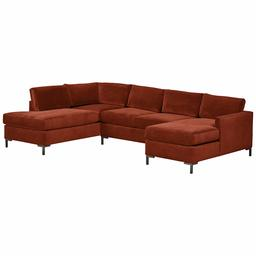

AttributeError: 'Series' object has no attribute 'item_name_in_en_us'

In [38]:
# @title
from pathlib import Path
from PIL import Image
from IPython.display import display


def get_image_from_item_id(item_id = "B07B4MYQMC", return_image=True):
    s3_data_root = 'data_tar_extracted/abo-images-small/images/small/'

    item_idx = dataset.query(f"item_id == '{item_id}'").index[0]

    s3_path = dataset.iloc[item_idx].path
    print(s3_path)
    #local_file_name = Path(s3_path).name
    #print(local_file_name)
    #s3down.download(f'{s3_data_root}{s3_path}', local_data_root)

    local_image_path = f"{s3_data_root}/{s3_path}"
    print(local_image_path)
    try:
        if return_image:
            img = Image.open(local_image_path)
            display(img)

            return img, dataset.iloc[item_idx].item_name_in_en_us
        else:
            return local_image_path, dataset.iloc[item_idx].item_name_in_en_us
    except FileNotFoundError:
        print(f"Image file not found: {local_image_path}")
        return None, dataset.iloc[item_idx].item_name_in_en_us

image, item_name = get_image_from_item_id()
print(item_name)



Generated caption for dataset incorporate that as well

In [47]:
dataset = pd.read_csv("dataset_with_captions.csv")

/var/folders/l1/m_780yf91fv8568sgxttg46r0000gn/T/ipykernel_41418/2276895563.py:1: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  dataset = pd.read_csv("dataset_with_captions.csv")


In [48]:
# Check if duplicates are there
print(dataset["item_id"].nunique())
print(dataset.count())

121549
item_id            121549
product_type       121549
brand              121520
model_name          74238
item_name_in_en    121549
bullet_point       112692
color               97756
style               29918
main_image_id      121549
item_keywords      106867
image_id           121549
height             121549
width              121549
path               121549
img_full_path      121549
caption                 0
captions             9549
dtype: int64


In [49]:
# drop duplicate items per id
dataset.drop_duplicates(subset=['item_id'], inplace=True)
print(dataset.count())

item_id            121549
product_type       121549
brand              121520
model_name          74238
item_name_in_en    121549
bullet_point       112692
color               97756
style               29918
main_image_id      121549
item_keywords      106867
image_id           121549
height             121549
width              121549
path               121549
img_full_path      121549
caption                 0
captions             9549
dtype: int64


In [50]:
dataset.columns

Index(['item_id', 'product_type', 'brand', 'model_name', 'item_name_in_en',
       'bullet_point', 'color', 'style', 'main_image_id', 'item_keywords',
       'image_id', 'height', 'width', 'path', 'img_full_path', 'caption',
       'captions'],
      dtype='object')

In [51]:
# check type of dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121549 entries, 0 to 121548
Data columns (total 17 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   item_id          121549 non-null  object 
 1   product_type     121549 non-null  object 
 2   brand            121520 non-null  object 
 3   model_name       74238 non-null   object 
 4   item_name_in_en  121549 non-null  object 
 5   bullet_point     112692 non-null  object 
 6   color            97756 non-null   object 
 7   style            29918 non-null   object 
 8   main_image_id    121549 non-null  object 
 9   item_keywords    106867 non-null  object 
 10  image_id         121549 non-null  object 
 11  height           121549 non-null  int64  
 12  width            121549 non-null  int64  
 13  path             121549 non-null  object 
 14  img_full_path    121549 non-null  object 
 15  caption          0 non-null       float64
 16  captions         9549 non-null    obje

In [52]:
# Get missing values count for each item
missing_values_count = dataset.isnull().sum()

# Print the number of missing values in each column
print(missing_values_count)

item_id                 0
product_type            0
brand                  29
model_name          47311
item_name_in_en         0
bullet_point         8857
color               23793
style               91631
main_image_id           0
item_keywords       14682
image_id                0
height                  0
width                   0
path                    0
img_full_path           0
caption            121549
captions           112000
dtype: int64


In [53]:

# Count empty strings
empty_string_count = (dataset['caption'] == '').sum()
print("Number of empty strings in 'caption':", empty_string_count)

# Count NaN values
nan_count = dataset['caption'].isna().sum()
print("Number of NaN values in 'caption':", nan_count)



Number of empty strings in 'caption': 0
Number of NaN values in 'caption': 121549


In [54]:

# Check the result
print(dataset.head())

      item_id         product_type  \
0  B0857LSVB7  CELLULAR_PHONE_CASE   
1  B07C5FF8QS             AUTO_OIL   
2  B07TG425LX  CELLULAR_PHONE_CASE   
3  B07LCHFZCW              GROCERY   
4  B077W2YX72              GROCERY   

                                               brand             model_name  \
0  [{'language_tag': 'en_IN', 'value': 'Amazon Br...  Samsung Galaxy J2 Ace   
1  [{'language_tag': 'en_SG', 'value': 'AmazonBas...                    NaN   
2  [{'language_tag': 'en_IN', 'value': 'Amazon Br...         Huawei P9 lite   
3  [{'language_tag': 'en_US', 'value': 'Amazon Go'}]                    NaN   
4  [{'language_tag': 'en_US', 'value': 'Wickedly ...                    NaN   

                                     item_name_in_en  \
0  Amazon Brand - Solimo Designer Lion UV Printed...   
1  AmazonBasics High Mileage Motor Oil, Synthetic...   
2  Amazon Brand - Solimo Designer Semi Circle Tex...   
3   Amazon Kitchen, Cajun Style Potato Salad, 7.2 oz   
4  Wickedly Prim

In [57]:
dataset['model_name'].fillna('Unknown', inplace=True)
dataset['color'].fillna('Unknown', inplace=True)
dataset['style'].fillna('Unknown', inplace=True)
dataset['captions'].fillna('Not Created', inplace=True)
dataset['bullet_point'].fillna('Unknown', inplace=True)
dataset['item_keywords'].fillna('Unknown', inplace=True)


In [59]:
dataset['brand'].fillna('Unknown', inplace=True)

In [62]:
missing_values_count = dataset.isnull().sum()

# Print the number of missing values in each column
print(missing_values_count)

item_id                 0
product_type            0
brand                   0
model_name              0
item_name_in_en         0
bullet_point            0
color                   0
style                   0
main_image_id           0
item_keywords           0
image_id                0
height                  0
width                   0
path                    0
img_full_path           0
caption            121549
captions                0
dtype: int64


There were duplicate captions generated for one item as generated  more than one so cleaning up duplicates

In [63]:
def remove_duplicates(caption):
    # Split the string by semicolon, remove extra spaces, and remove duplicates
    unique_items = set(item.strip() for item in caption.split(';'))
    # Join the unique items back into a string
    return '; '.join(sorted(unique_items))  # sorted for consistent order

# Apply the function to the 'captions' column
dataset['captions'] = dataset['captions'].apply(remove_duplicates)

# Check the results
print(dataset['captions'].head())

0                          a lion phone case
1    a bottle of liquid on a grey background
2                      a colorful phone case
3      a package of cajun style potato salad
4                     a jar of peanut butter
Name: captions, dtype: object


In [64]:
dataset.head(100)

,item_id,product_type,brand,model_name,item_name_in_en,bullet_point,color,style,main_image_id,item_keywords,image_id,height,width,path,img_full_path,caption,captions
0,B0857LSVB7,CELLULAR_PHONE_CASE,"[{'language_tag': 'en_IN', 'value': 'Amazon Br...",Samsung Galaxy J2 Ace,Amazon Brand - Solimo Designer Lion UV Printed...,"Snug fit for Samsung Galaxy J2 Ace, with perfe...",Multicolor,Unknown,81-DuD5XzmL,"Back Cover, Designer Case, Designer Lion Mobil...",81-DuD5XzmL,2200,1879,39/39df5b7d.jpg,/content/drive/MyDrive/shoptalk-v1/data/images...,NaN,a lion phone case
1,B07C5FF8QS,AUTO_OIL,"[{'language_tag': 'en_SG', 'value': 'AmazonBas...",Unknown,"AmazonBasics High Mileage Motor Oil, Synthetic...","For best performance, follow the manufacturer'...",Unknown,High Mileage - Synthetic Blend,81YCp3dcurL,"oil, mobil 1, penzoil, castrol gtx, 5W-20, 5W-...",81YCp3dcurL,2339,1808,0f/0f039d0e.jpg,/content/drive/MyDrive/shoptalk-v1/data/images...,NaN,a bottle of liquid on a grey background
2,B07TG425LX,CELLULAR_PHONE_CASE,"[{'language_tag': 'en_IN', 'value': 'Amazon Br...",Huawei P9 lite,Amazon Brand - Solimo Designer Semi Circle Tex...,3D Printed Hard Back Case Mobile Cover for Hua...,Others,Unknown,71ZoXfUr-sL,"mobile cover, back cover, mobile case, phone c...",71ZoXfUr-sL,2200,1879,56/562f90f1.jpg,/content/drive/MyDrive/shoptalk-v1/data/images...,NaN,a colorful phone case
3,B07LCHFZCW,GROCERY,"[{'language_tag': 'en_US', 'value': 'Amazon Go'}]",Unknown,"Amazon Kitchen, Cajun Style Potato Salad, 7.2 oz",Unknown,Unknown,Unknown,61bCuBtuZ4L,Unknown,61bCuBtuZ4L,1000,974,87/87b38aee.jpg,/content/drive/MyDrive/shoptalk-v1/data/images...,NaN,a package of cajun style potato salad
4,B077W2YX72,GROCERY,"[{'language_tag': 'en_US', 'value': 'Wickedly ...",Unknown,"Wickedly Prime Peanut Butter-Filled Pretzels, ...","One 44-ounce plastic tub, Contains wheat, pean...",Unknown,Unknown,71QbaO8qZIL,"pretzels, peanut butter, peanut butter pretzel...",71QbaO8qZIL,1114,600,3b/3b197757.jpg,/content/drive/MyDrive/shoptalk-v1/data/images...,NaN,a jar of peanut butter
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,B07TJVTGPM,CELLULAR_PHONE_CASE,"[{'language_tag': 'en_IN', 'value': 'Amazon Br...",Oppo F5,Amazon Brand - Solimo Designer Engraved Patten...,3D Printed Hard Back Case Mobile Cover for Opp...,Others,Unknown,81zXldU03IL,"mobile cover, back cover, mobile case, phone c...",81zXldU03IL,2200,1879,8d/8d5f0e9c.jpg,/content/drive/MyDrive/shoptalk-v1/data/images...,NaN,the back of a wooden phone case
96,B07CBCFNFJ,HERB,"[{'language_tag': 'en_IN', 'value': 'Vedaka'}]",Unknown,"Amazon Brand - Vedaka Cardamom (Elaichi), 100g","No artificial colours and preservatives, Consi...",Unknown,Unknown,91Ojw1mAUrL,"cardamom pantry, elaichi whole, green elaichi ...",91Ojw1mAUrL,2560,1962,0b/0b67d5d5.jpg,/content/drive/MyDrive/shoptalk-v1/data/images...,NaN,a bag of sunflower seeds
97,B07TCWV8DH,CELLULAR_PHONE_CASE,"[{'language_tag': 'en_IN', 'value': 'Amazon Br...",Gionee Elife S7,Amazon Brand - Solimo Designer Group Birds 3D ...,3D Printed Hard Back Case Mobile Cover for Gio...,Others,Unknown,61mb7wroFfL,"mobile cover, back cover, mobile case, phone c...",61mb7wroFfL,2200,1879,04/042751a8.jpg,/content/drive/MyDrive/shoptalk-v1/data/images...,NaN,a sunset with birds flying in the sky
98,B07T24ZPNW,CELLULAR_PHONE_CASE,"[{'language_tag': 'en_IN', 'value': 'Amazon Br...",Micromax Canvas Knight 2 E471,Amazon Brand - Solimo Designer Mash Painting 3...,3D Printed Hard Back Case Mobile Cover for Mic...,Others,Unknown,71jQFAwsT5L,"mobile cover, back cover, mobile case, phone c...",71jQFAwsT5L,2200,1879,96/9636478c.jpg,/content/drive/MyDrive/shoptalk-v1/data/images...,NaN,a phone case with a colorful swirl design


In [ ]:
dataset.to_csv('processed_dataset.csv', index=False)

In [65]:
filtered_df = dataset[dataset['captions'] != 'Not Created']

In [66]:
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9549 entries, 0 to 10495
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   item_id          9549 non-null   object 
 1   product_type     9549 non-null   object 
 2   brand            9549 non-null   object 
 3   model_name       9549 non-null   object 
 4   item_name_in_en  9549 non-null   object 
 5   bullet_point     9549 non-null   object 
 6   color            9549 non-null   object 
 7   style            9549 non-null   object 
 8   main_image_id    9549 non-null   object 
 9   item_keywords    9549 non-null   object 
 10  image_id         9549 non-null   object 
 11  height           9549 non-null   int64  
 12  width            9549 non-null   int64  
 13  path             9549 non-null   object 
 14  img_full_path    9549 non-null   object 
 15  caption          0 non-null      float64
 16  captions         9549 non-null   object 
dtypes: float64(1), int

In [67]:
del filtered_df['image_id']

In [ ]:
filtered_df.to_csv('processed_dataset_source_with_captions_only.csv', index=False)

In [68]:
# These are image related cloumns not needed any more
columns_to_combine = filtered_df.drop(['height', 'width','main_image_id'], axis=1)
columns_to_combine.columns

Index(['item_id', 'product_type', 'brand', 'model_name', 'item_name_in_en',
       'bullet_point', 'color', 'style', 'item_keywords', 'path',
       'img_full_path', 'caption', 'captions'],
      dtype='object')

In [69]:
columns_to_combine.columns

Index(['item_id', 'product_type', 'brand', 'model_name', 'item_name_in_en',
       'bullet_point', 'color', 'style', 'item_keywords', 'path',
       'img_full_path', 'caption', 'captions'],
      dtype='object')

In [ ]:
# Combinging all data in to one column to make input for the llm model.
import pandas as pd

# Assuming 'df' is your DataFrame and you've loaded it already
# Verify data types and look for any anomalies
print(filtered_df.dtypes)
print(filtered_df.head())  # Print the first few rows to inspect them

# Optionally, you can handle missing values by filling them with an empty string or a placeholder
filtered_df.fillna('', inplace=True)

# Select all columns except 'main_image_id'
columns_to_combine = filtered_df.columns.drop('main_image_id')

# Safely combine the data from the selected columns into a new column with space-separated values
filtered_df['combined'] = filtered_df[columns_to_combine].apply(lambda x: ' '.join(x.astype(str)), axis=1)

# Check the results
print(filtered_df['combined'].head())


item_id             object
product_type        object
brand               object
model_name          object
item_name_in_en     object
bullet_point        object
color               object
style               object
main_image_id       object
item_keywords       object
height             float64
width              float64
path                object
captions            object
dtype: object
      item_id         product_type                  brand  \
0  B0857LSVB7  CELLULAR_PHONE_CASE  Amazon Brand - Solimo   
1  B07C5FF8QS             AUTO_OIL           AmazonBasics   
2  B07TG425LX  CELLULAR_PHONE_CASE  Amazon Brand - Solimo   
3  B07LCHFZCW              GROCERY              Amazon Go   
4  B077W2YX72              GROCERY         Wickedly Prime   

              model_name                                    item_name_in_en  \
0  Samsung Galaxy J2 Ace  Amazon Brand - Solimo Designer Lion UV Printed...   
1                Unknown  AmazonBasics High Mileage Motor Oil, Synthetic...   
2   

<ipython-input-68-111b0b408ded>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df.fillna('', inplace=True)


0    B0857LSVB7 CELLULAR_PHONE_CASE Amazon Brand - ...
1    B07C5FF8QS AUTO_OIL AmazonBasics Unknown Amazo...
2    B07TG425LX CELLULAR_PHONE_CASE Amazon Brand - ...
3    B07LCHFZCW GROCERY Amazon Go Unknown Amazon Ki...
4    B077W2YX72 GROCERY Wickedly Prime Unknown Wick...
Name: combined, dtype: object


<ipython-input-68-111b0b408ded>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['combined'] = filtered_df[columns_to_combine].apply(lambda x: ' '.join(x.astype(str)), axis=1)


Loading final dataset and performing some more analysis

In [3]:
df = pd.read_csv('/Users/user/Documents/MLProjects/project6/ShopTalk/artifacts/data_ingestion/data_tar_extracted/processed_dataset_target_data_with_captions_only.csv')

In [4]:
df.head()

,item_id,product_type,brand,model_name,item_name_in_en,bullet_point,color,style,main_image_id,item_keywords,height,width,path,captions,combined
0,B0857LSVB7,CELLULAR_PHONE_CASE,Amazon Brand - Solimo,Samsung Galaxy J2 Ace,Amazon Brand - Solimo Designer Lion UV Printed...,"Snug fit for Samsung Galaxy J2 Ace, with perfe...",Multicolor,Unknown,81-DuD5XzmL,"Back Cover, Designer Case, Designer Lion Mobil...",0.440702,0.166508,39/39df5b7d.jpg,a lion phone case,B0857LSVB7 CELLULAR_PHONE_CASE Amazon Brand - ...
1,B07C5FF8QS,AUTO_OIL,AmazonBasics,Unknown,"AmazonBasics High Mileage Motor Oil, Synthetic...","For best performance, follow the manufacturer'...",Unknown,High Mileage - Synthetic Blend,81YCp3dcurL,"oil, mobil 1, penzoil, castrol gtx, 5W-20, 5W-...",0.697580,0.031628,0f/0f039d0e.jpg,a bottle of liquid on a grey background,B07C5FF8QS AUTO_OIL AmazonBasics Unknown Amazo...
2,B07TG425LX,CELLULAR_PHONE_CASE,Amazon Brand - Solimo,Huawei P9 lite,Amazon Brand - Solimo Designer Semi Circle Tex...,3D Printed Hard Back Case Mobile Cover for Hua...,Others,Unknown,71ZoXfUr-sL,"mobile cover, back cover, mobile case, phone c...",0.440702,0.166508,56/562f90f1.jpg,a colorful phone case,B07TG425LX CELLULAR_PHONE_CASE Amazon Brand - ...
3,B07LCHFZCW,GROCERY,Amazon Go,Unknown,"Amazon Kitchen, Cajun Style Potato Salad, 7.2 oz",Unknown,Unknown,Unknown,61bCuBtuZ4L,Unknown,-1.776954,-1.552741,87/87b38aee.jpg,a package of cajun style potato salad,B07LCHFZCW GROCERY Amazon Go Unknown Amazon Ki...
4,B077W2YX72,GROCERY,Wickedly Prime,Unknown,"Wickedly Prime Peanut Butter-Filled Pretzels, ...","One 44-ounce plastic tub, Contains wheat, pean...",Unknown,Unknown,71QbaO8qZIL,"pretzels, peanut butter, peanut butter pretzel...",-1.566277,-2.263237,3b/3b197757.jpg,a jar of peanut butter,B077W2YX72 GROCERY Wickedly Prime Unknown Wick...


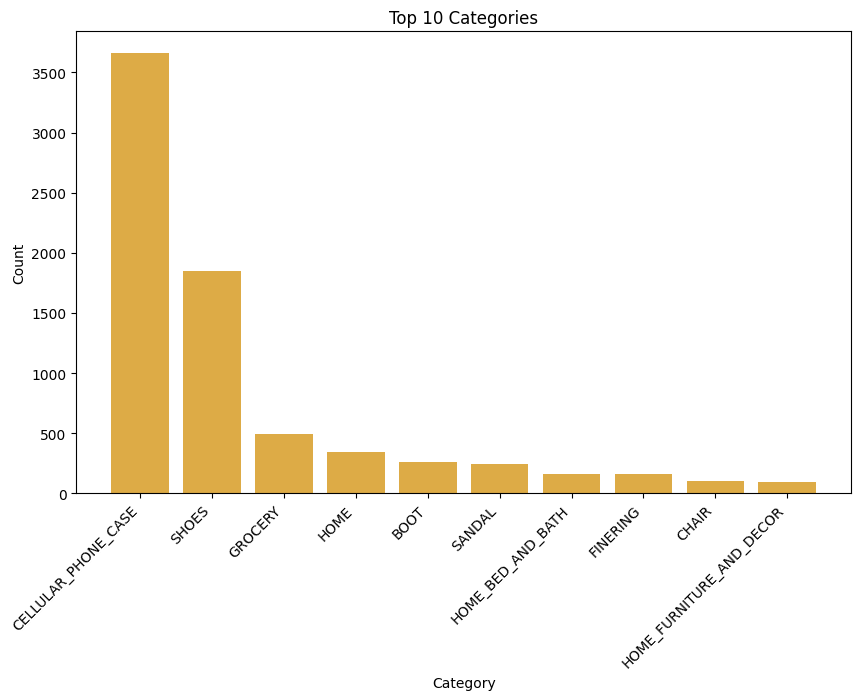

In [5]:
import matplotlib.pyplot as plt

distinct_categories = df['product_type'].unique()

# Count occurrences of each category type
category_counts = {}
for category in distinct_categories:
    count = (df['product_type'] == category).sum()
    category_counts[category] = count

# Sort categories by count in descending order
sorted_categories = sorted(category_counts.items(), key=lambda x: x[1], reverse=True)

# Get top 10 categories
top_10_categories = dict(sorted_categories[:10])

# Plot count of each top 10 category
plt.figure(figsize=(10, 6))
plt.bar(top_10_categories.keys(), top_10_categories.values(), color='#ddab46')
plt.title('Top 10 Categories')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()


In [6]:

# Assuming df is your DataFrame containing the data
categorydata = df[["item_id","product_type"]]

# Count occurrences of each category type
category_counts = categorydata['product_type'].value_counts()

# Get top 10 categories
top_10_categories = category_counts.head(10)

# Apply styling and display
top_10_categories_styled = top_10_categories.reset_index().rename(columns={'index': 'Category', 'product_type': 'Count'}).style.set_properties(**{"background-color": "#ddab46","color":"#092434","border": "1.5px #ddab46"})
top_10_categories_styled


,Count,count
0,CELLULAR_PHONE_CASE,3658
1,SHOES,1848
2,GROCERY,494
3,HOME,343
4,BOOT,260
5,SANDAL,246
6,HOME_BED_AND_BATH,165
7,FINERING,161
8,CHAIR,104
9,HOME_FURNITURE_AND_DECOR,94


In [7]:
print(f"Summary of the dataset :")
categorydata.describe().T.style.set_properties(**{"background-color": "#ddab46","color":"#092434","border": "1.5px #ddab46"})

Summary of the dataset :


,count,unique,top,freq
item_id,9549,9549,B0857LSVB7,1
product_type,9549,277,CELLULAR_PHONE_CASE,3658
